In [203]:
import tensorflow as tf
import numpy as np

**Convención, orden de los ejes:**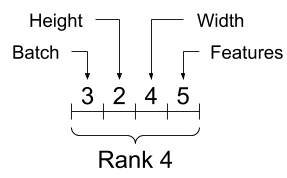

**Los tensores son constantes de tipo uniforme (DType):**

In [248]:
x = tf.constant(1)
print(x.shape)
print(x.dtype)

()
<dtype: 'int32'>


In [205]:
x = tf.constant([1., 2.])
print(x.shape)

(2,)


In [206]:
x = tf.constant([[1., 2.],
                 [2., 1.]])
print(x)

tf.Tensor(
[[1. 2.]
 [2. 1.]], shape=(2, 2), dtype=float32)


**Se pueden convertir a numpy:**

In [207]:
print(f'\nSe imprime limpio:\n\n{x.numpy()}\n')


Se imprime limpio:

[[1. 2.]
 [2. 1.]]



In [208]:
np.array(x) == x.numpy()

array([[ True,  True],
       [ True,  True]])

**Operaciones con matrices:**

In [209]:
print(x.numpy())

[[1. 2.]
 [2. 1.]]


In [214]:
print((2 * x).numpy())
a = tf.multiply(x, 2)==x*2
print(a.numpy())

[[2. 4.]
 [4. 2.]]
[[ True  True]
 [ True  True]]


In [215]:
print((x + x).numpy())

[[2. 4.]
 [4. 2.]]


In [216]:
print((x / x).numpy())

[[1. 1.]
 [1. 1.]]


In [217]:
print((x * x).numpy())

[[1. 4.]
 [4. 1.]]


In [218]:
print((x @ x).numpy())

[[5. 4.]
 [4. 5.]]


**Funciones de agregación:**

In [219]:
print(tf.reduce_max(x).numpy())

2.0


In [220]:
print(tf.argmax(x).numpy())

[1 0]


In [221]:
print(tf.nn.softmax(x).numpy())

[[0.26894143 0.7310586 ]
 [0.7310586  0.26894143]]


**Indexación:**

In [222]:
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [223]:
print('\n', x[::-2].numpy())
print('\nCada elemento considerado es un vector (No se usan comas)\nSe consideran todos los elementos (::)\nPaso = 2 (salteando un elemento en cada paso)\nOrden inverso (negativo)\n')


 [[7 8 9]
 [1 2 3]]

Cada elemento considerado es un vector (No se usan comas)
Se consideran todos los elementos (::)
Paso = 2 (salteando un elemento en cada paso)
Orden inverso (negativo)



In [224]:
print(x[1:, :].numpy())

[[4 5 6]
 [7 8 9]]


In [225]:
x = tf.constant([
                 [ [1, 2], [3, 4] ],
                 [ [5, 6], [7, 8] ]
                ])
print(x.numpy())

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [226]:
print(x[:, :, 1].numpy())

[[2 4]
 [6 8]]


In [227]:
n_batch = 0
print(x[n_batch, :, :].numpy())

[[1 2]
 [3 4]]


**Reshape:**

Los datos permanecen igual en memoria. Abstracción simil C

In [228]:
x = [
        [
            [ 0, 1, 2, 3, 4],
            [ 5, 6, 7, 8, 9]
        ],[
            [10, 11, 12, 13, 14],
            [15, 16, 17, 18, 19]
        ],[
            [20, 21, 22, 23, 24],
            [25, 26, 27, 28, 29]
        ]
    ]

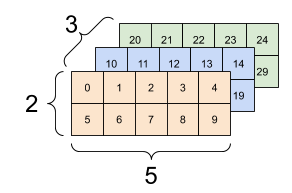

In [229]:
print(tf.reshape(x, [-1]).numpy())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [230]:
print(tf.reshape(x, [30]).numpy(), '\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 



La siguiente operación NO esta permitida, la última fila no tiene elementos suficientes.
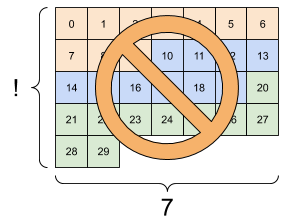

Estos serian formateos considerados conceptualmente validos.

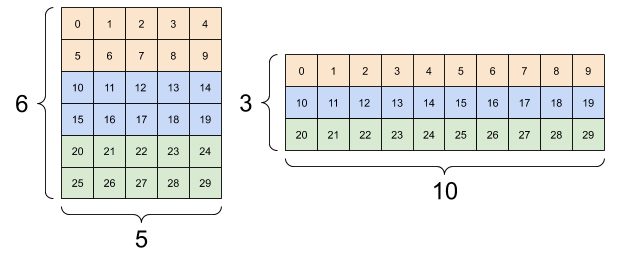

In [231]:
print(tf.reshape(x, [6,int(30/6)]).numpy())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


La siguiente operación ESTA permitida, pero, segun el caso, hay que evaluar que la informacion no pierda sentido:

In [232]:
print(tf.reshape(x, [5,int(30/5)]).numpy())

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


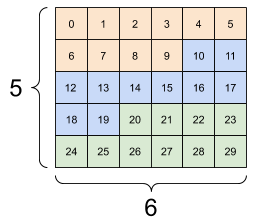

**Casteos:**

In [233]:
tf.cast(x, dtype=tf.uint8).dtype

tf.uint8

**Crear tensores:**

In [234]:
print(tf.zeros([2,2]).numpy())

[[0. 0.]
 [0. 0.]]


In [249]:
print(tf.range(1,5).numpy())

array([1, 2, 3, 4])

In [255]:
print(tf.linspace(-2, 2, 6).numpy())

[-2.  -1.2 -0.4  0.4  1.2  2. ]


In [260]:
print(tf.random.uniform([5], minval=-1, maxval=2, dtype=tf.float32).numpy())

[-0.57251096  0.7915243   1.0727878   1.214617    0.4214903 ]


In [262]:
print(tf.random.normal(shape=[5], mean=0, stddev=1).numpy())

[ 0.44439477  0.56404626  1.8371512   0.31992275 -1.9766159 ]


**Transmisión:**

Son eficientes, no se materializan en memoria

In [236]:
a = tf.constant([1, 2, 3])
b = tf.constant(2) # se estira automaticamente
c = tf.constant([2, 2, 2])
print(a * b == a * c)

tf.Tensor([ True  True  True], shape=(3,), dtype=bool)


In [247]:
a = tf.reshape(a,[3,1])
b = tf.range(1, 5)
# (4,) se estira a (1,4) automaticamente. No es necesario b = tf.reshape(b,[1,4])
print(a.shape, "*", b.shape, "\n")
print((a * b).numpy())

(3, 1) * (4,) 

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


**Convercion automatica a tensor:**

Muchas funciones que reciven un tf.Tensor, tambien aceptan similares, tales como: ndarray de NumPy, TensorShape , listas de Python y tf.Variable

Usan tf.convert_to_tensor